In [2]:
import numpy as np
import scipy
import scipy.optimize
import matplotlib.pyplot as plt
%matplotlib inline

Давайте напишем класс, который будеть искать линейную зависимость методом наименьших квадратов

$\sum_{i=1}^n (<w, x_i> - y_i)^2 \to \min_{w}$

заодно узнаем как писать свои классы :)

In [3]:
class LinearModel(object): # наследуемся от object – стандартная практика
    def __init__(self, loss_function): # конструктор имеет название __init__ и первым аргументом всегда имеет self
        self.loss_function = loss_function
        
    def fit(self, X_data, y_data):
        """
        тут можно написать документацию метода
        X - это выборка признаков, y - выборка целевых переменных
        """
        # пока сделаем реализацию через scipy.optimize
        
        def func(weights):
            return np.sum(self.loss_function(np.dot(X_data, weights[1:]) 
                                                  + weights[0] - y_data))
        
        self.weights = scipy.optimize.minimize(func, np.ones(X_data.shape[1] + 1)).x
        return self
        
    def predict(self, X_data):
        return np.dot(X_data, self.weights[1:]) + self.weights[0]

# Задание

Допишите реализацию класса для обучения полиномиальной регресии, то есть по точкам $x_1, x_2, \dots, x_n$ и $y_1, y_2, \dots, y_n$ и заданному числу $d$ решить оптимизационную задачу:

$$ \sum_{i=1}^n (~f(x_i) - y_i~)^2 \min_f,$$ где f – полином степени не выше $d$.

In [24]:
class PolynomialRegression(object):
    
    def __init__(self, max_degree=1):
        self.max_degree = max_degree
        self.loss_function = lambda arr: (np.square(arr))
                                    #.mean()
                                    # np.abs(arr)
        
    def fit(self, points_x, points_y):
        # insert your code here to fit the model
        def func(weights):
            degs = np.arange(1, self.max_degree + 1)
            x_powered = points_x ** degs
            return np.sum(self.loss_function(np.dot(x_powered, weights[1:]) + weights[0] - points_y))
           
            
        self.weights = scipy.optimize.minimize(func, np.ones(points_x.shape[1] + self.max_degree)).x
        return self
    
    def predict(self, points_x):
        # insert your code here to predict the values
        print(self.weights)
        degs = np.arange(1, self.max_degree + 1)
        values = np.dot(points_x ** degs, self.weights[1:]) + self.weights[0]
        #values = np.dot(points_x, self.weights[1]) + np.dot(points_x **2, self.weights[2]) + np.dot(points_x **3, self.weights[3])  + np.dot(points_x **4, self.weights[4]) + self.weights[0]  
        return values

In [34]:
def plot_model(max_degree):
    plt.figure(figsize=(10, 5))
    plt.scatter(points_x, points_y)
    model = PolynomialRegression(max_degree).fit(points_x[:, np.newaxis], points_y)
    all_x = np.arange(-10, 10.1, 0.1)
    plt.plot(all_x, model.predict(all_x[:, np.newaxis]))
    plt.grid()
    plt.show()

[-8.72743757  1.16174408  1.21103547  0.08794552]


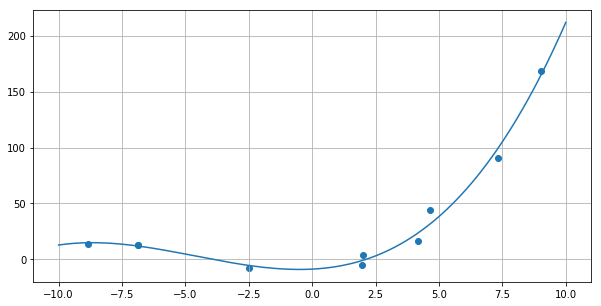

In [26]:
plot_model(3)

In [9]:
np.ones(points_x[:, np.newaxis].shape[1] + 2)
points_x[:, np.newaxis]

array([[-2.50919762],
       [ 9.01428613],
       [ 4.63987884],
       [ 1.97316968],
       [-6.87962719],
       [-6.88010959],
       [-8.83832776],
       [ 7.32352292],
       [ 2.02230023],
       [ 4.16145156]])

In [160]:
points_x

array([-2.50919762,  9.01428613,  4.63987884,  1.97316968, -6.87962719,
       -6.88010959, -8.83832776,  7.32352292,  2.02230023,  4.16145156])

In [164]:
points_x[1]

9.014286128198322

In [156]:
points_x[:, np.newaxis].shape

(10, 1)

In [7]:
np.random.seed(42)
points_x = np.random.uniform(-10, 10, size=10)
# we use list comprehesion but think about how to write it using np.array operations
points_y = np.array([4 - x + x ** 2 + 0.1 * x ** 3 + np.random.uniform(-20, 20) for x in points_x])

In [144]:
print(points_x)
print(points_y)

[-2.50919762  9.01428613  4.63987884  1.97316968 -6.87962719 -6.88010959
 -8.83832776  7.32352292  2.02230023  4.16145156]
[ -7.95115896 168.28716662  44.17525425  -4.81797305  12.92112269
  12.98457452  14.08254073  90.57969618   4.17225852  16.01206135]


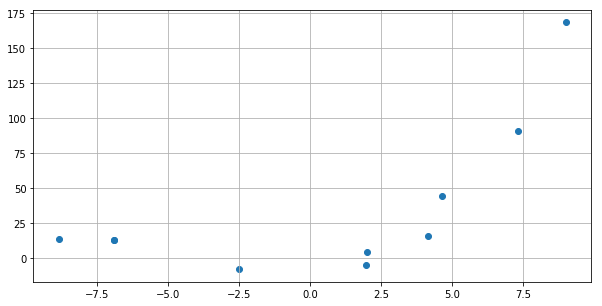

In [145]:
plt.figure(figsize=(10, 5))
plt.scatter(points_x, points_y)
plt.grid()
plt.show()

[-1.00147978e+07 -4.03330463e+06 -3.61331818e+08]


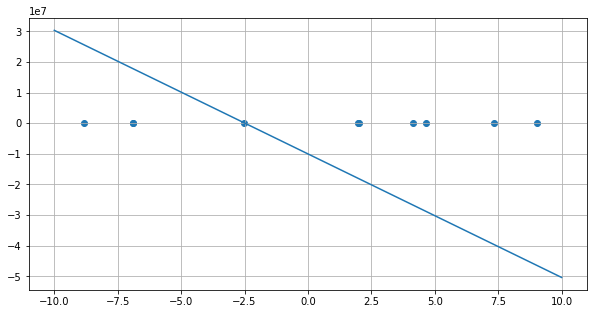

In [186]:
#PolynomialRegression(1).fit(points_x[:, np.newaxis], points_y)
plot_model(10)

In [30]:
#plot_model(1)
model = LinearModel(lambda arr: np.abs(arr)).fit(points_x[:, np.newaxis], points_y)

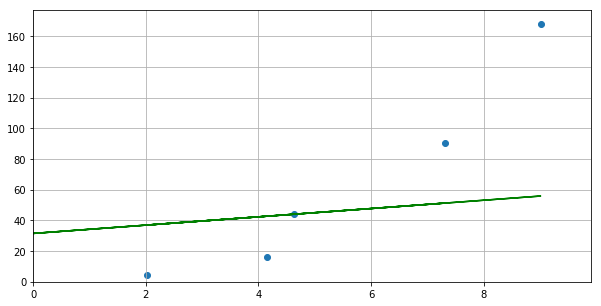

In [31]:
plt.figure(figsize=(10, 5))
plt.scatter(points_x, points_y)
plt.plot(points_x, model.predict(points_x[:, np.newaxis]), c='green')
plt.ylim(0)
plt.xlim(0)
plt.grid()
plt.show()

deg =  0
[35.04454741]


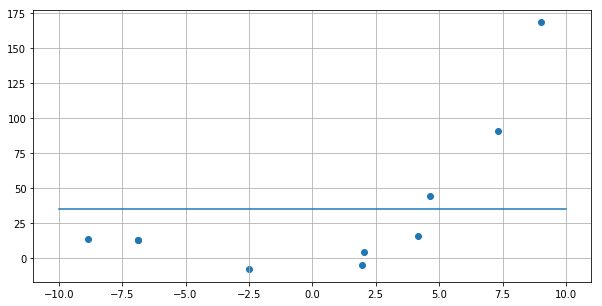

deg =  1
[32.77173017  5.64348432]


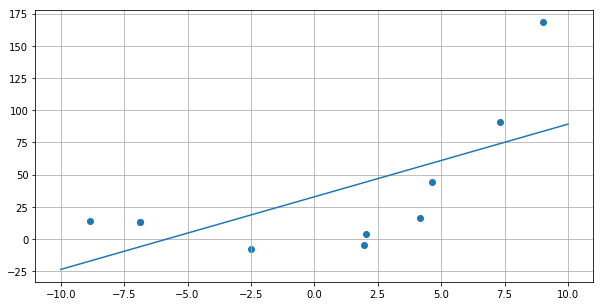

deg =  2
[-16.03346512   6.35346022   1.34477676]


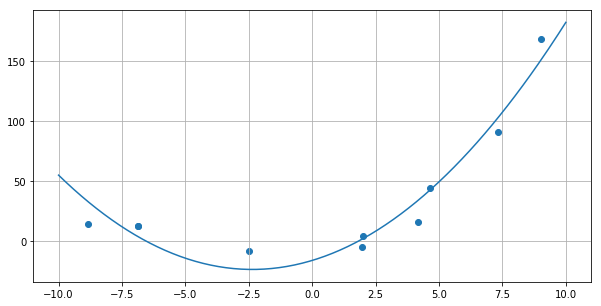

deg =  3
[-8.72743834  1.16174411  1.21103548  0.08794552]


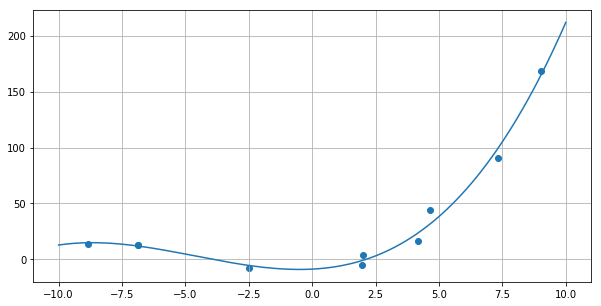

deg =  4
[-8.08505194e+00  1.15529471e+00  1.14981010e+00  8.78323308e-02
  7.50681226e-04]


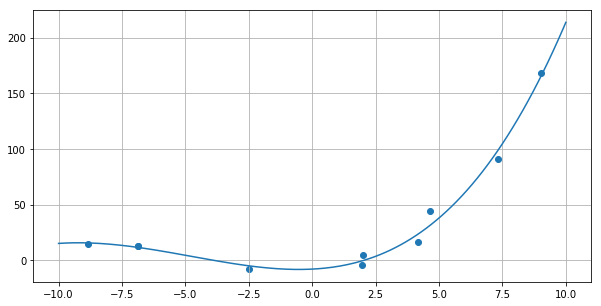

deg =  5
[-9.40938334e+00  2.92966473e+00  1.15288172e+00  2.45491066e-03
  8.40309807e-04  8.23944666e-04]


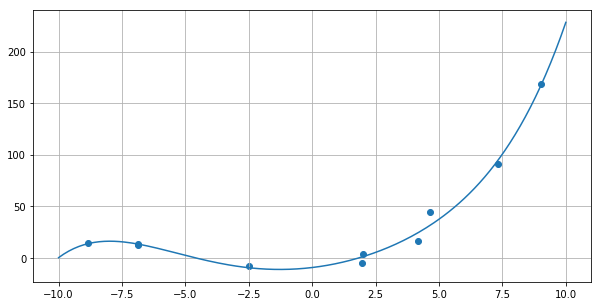

deg =  6
[-1.36434110e+01  2.24049537e+00  2.05787691e+00  2.24207584e-02
 -2.72799654e-02  6.70749296e-04  2.20049264e-04]


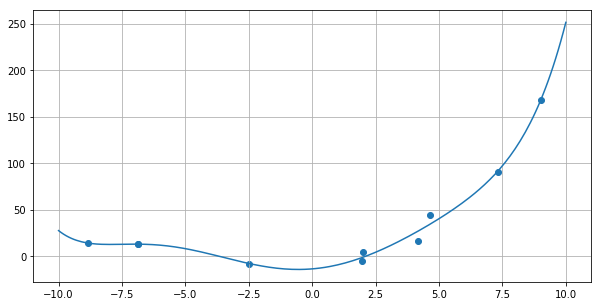

deg =  7
[-1.09477291e+02  3.28567790e+01  2.23853020e+01 -5.14455993e+00
 -6.49939586e-01  1.46620608e-01  5.08995271e-03 -1.08256085e-03]


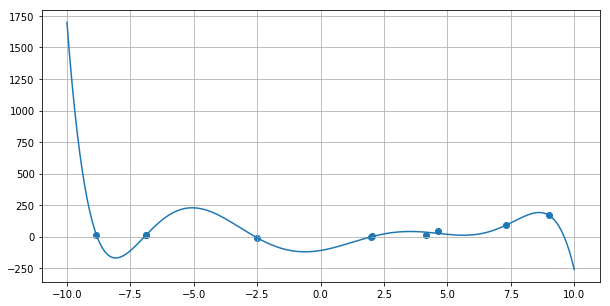

deg =  8
[ 1.81184082e+04 -1.04233308e+04 -2.39572415e+03  1.96388201e+03
 -1.29488579e+02 -5.78245670e+01  6.07725937e+00  4.41047629e-01
 -5.19496406e-02]


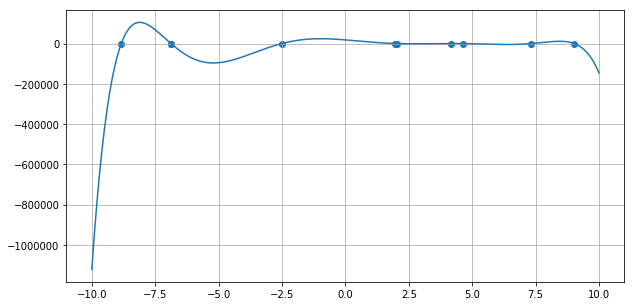

deg =  9
[-5.96894117e+04 -8.94409439e+03  2.83012884e+04  9.70245449e+01
 -3.41423900e+03  3.28697947e+02  9.27141831e+01 -1.09787060e+01
 -6.86331906e-01  8.65789165e-02]


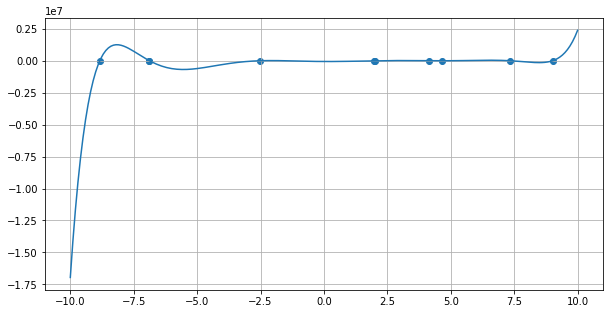

In [20]:
for i in range(10):
    print ('deg = ', i)
    plot_model(i)

Объясните почему графики меняются таким образом

**Значение для формы**

In [35]:
points_z = np.array([10, -5, -15])

In [36]:
points_z[:, np.newaxis][0]

array([10])

In [37]:
print(int(
    PolynomialRegression(7).fit(points_x[:, np.newaxis], points_y).predict(points_z[:, np.newaxis][0])
    + PolynomialRegression(1).fit(points_x[:, np.newaxis], points_y).predict(points_z[:, np.newaxis][1])
    + PolynomialRegression(4).fit(points_x[:, np.newaxis], points_y).predict(points_z[:, np.newaxis][2])
))

[-1.09393722e+02  2.99538571e+01  2.21375216e+01 -4.82890527e+00
 -6.40104110e-01  1.38649706e-01  5.00221738e-03 -1.02609975e-03]
[32.77172665  5.64348475]
[-8.08505065e+00  1.15529465e+00  1.14981002e+00  8.78323315e-02
  7.50681975e-04]
-240
